In [4]:
import pandas as pd

# Load the data
file_path = 'marketing_AB.csv'
data = pd.read_csv(file_path)

# Divide the data into two equal parts for conducting A/B testing based on "ad" and "psa" in the test group column
group_ad = data[data['test group'] == 'ad']
group_psa = data[data['test group'] == 'psa']

# Calculate the percentage of users who converted in each group
conversion_rate_ad = group_ad['converted'].mean() * 100
conversion_rate_psa = group_psa['converted'].mean() * 100

print(f"Conversion rate for Ad Group: {conversion_rate_ad:.2f}%")
print(f"Conversion rate for PSA Group: {conversion_rate_psa:.2f}%")


Conversion rate for Ad Group: 2.55%
Conversion rate for PSA Group: 1.79%


In [2]:
print(data.describe())

          Unnamed: 0       user id      total ads  most ads hour
count  588101.000000  5.881010e+05  588101.000000  588101.000000
mean   294050.000000  1.310692e+06      24.820876      14.469061
std    169770.279667  2.022260e+05      43.715181       4.834634
min         0.000000  9.000000e+05       1.000000       0.000000
25%    147025.000000  1.143190e+06       4.000000      11.000000
50%    294050.000000  1.313725e+06      13.000000      14.000000
75%    441075.000000  1.484088e+06      27.000000      18.000000
max    588100.000000  1.654483e+06    2065.000000      23.000000


In [3]:
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
# Calculate the max and min number of the total ads for each group
max_total_ads_ad = group_ad['total ads'].max()
min_total_ads_ad = group_ad['total ads'].min()
max_total_ads_psa = group_psa['total ads'].max()
min_total_ads_psa = group_psa['total ads'].min()

# Calculate the day of the week that the most and least ads were seen
most_ads_day = data.groupby('most ads day')['total ads'].sum().idxmax()
least_ads_day = data.groupby('most ads day')['total ads'].sum().idxmin()

# Calculate the hour of the day that the most and least ads were seen
most_ads_hour = data.groupby('most ads hour')['total ads'].sum().idxmax()
least_ads_hour = data.groupby('most ads hour')['total ads'].sum().idxmin()

print(f"Max total ads for Ad Group: {max_total_ads_ad}")
print(f"Min total ads for Ad Group: {min_total_ads_ad}")
print(f"Max total ads for PSA Group: {max_total_ads_psa}")
print(f"Min total ads for PSA Group: {min_total_ads_psa}")
print(f"Day of the week with most ads: {most_ads_day}")
print(f"Day of the week with least ads: {least_ads_day}")
print(f"Hour of the day with most ads: {most_ads_hour}")
print(f"Hour of the day with least ads: {least_ads_hour}")

Max total ads for Ad Group: 2065
Min total ads for Ad Group: 1
Max total ads for PSA Group: 907
Min total ads for PSA Group: 1
Day of the week with most ads: Friday
Day of the week with least ads: Tuesday
Hour of the day with most ads: 12
Hour of the day with least ads: 4


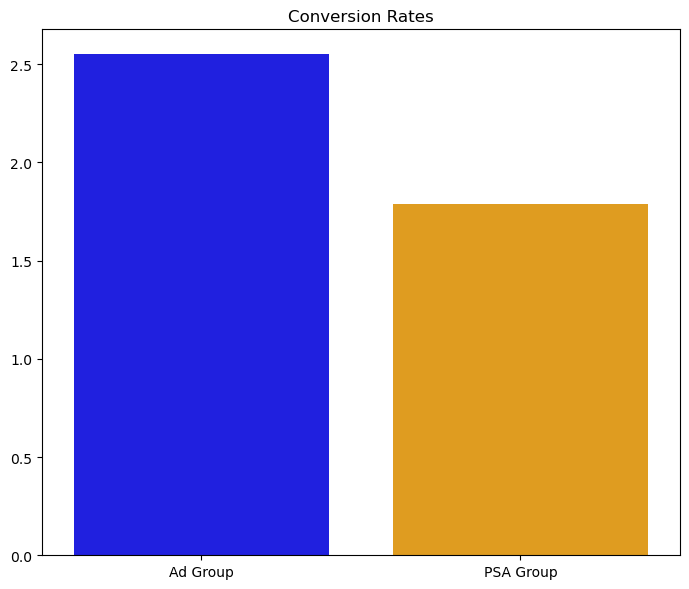

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for conversion rates
conversion_rate_ad = 2.55
conversion_rate_psa = 1.79

# Plot Conversion Rates
plt.figure(figsize=(7, 6))
conversion_rates = pd.DataFrame({
    'Group': ['Ad Group', 'PSA Group'],
    'Conversion Rate': [conversion_rate_ad, conversion_rate_psa]
})

sns.barplot(
    x='Group', 
    y='Conversion Rate', 
    hue='Group', 
    data=conversion_rates, 
    palette={'Ad Group': 'blue', 'PSA Group': 'orange'}, 
    dodge=False
)
plt.title('Conversion Rates')
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')  # Remove y-axis label
plt.legend([], [], frameon=False)  # Remove legend
plt.tight_layout()
plt.show()


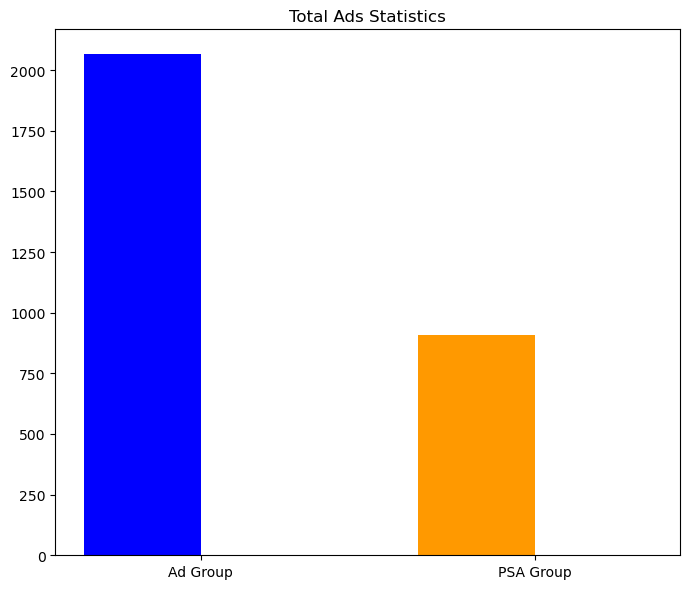

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data for total ads statistics
max_total_ads_ad = 2065
max_total_ads_psa = 907
min_total_ads_ad = 1
min_total_ads_psa = 1

# Plot Total Ads Statistics
plt.figure(figsize=(7, 6))
bar_width = 0.35
x = np.arange(2)

max_ads = [max_total_ads_ad, max_total_ads_psa]
min_ads = [min_total_ads_ad, min_total_ads_psa]

# Set colors for each group: same blue for Ad Group, orange for PSA Group
colors = [
    'blue',  # Blue for Ad Group max
    '#FF9900',  # Orange for PSA Group max
    'blue',  # Blue for Ad Group min
    '#FF9900'   # Orange for PSA Group min
]

# Plot with specific colors
plt.bar(x - bar_width/2, max_ads, bar_width, color=[colors[0], colors[1]], label='Max Total Ads')
plt.bar(x + bar_width/2, min_ads, bar_width, color=[colors[2], colors[3]], label='Min Total Ads')

plt.xticks(x, ['Ad Group', 'PSA Group'])
plt.title('Total Ads Statistics')
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')  # Remove y-axis label
plt.legend([], [], frameon=False)  # Remove legend
plt.tight_layout()
plt.show()

C:\Users\angin\AppData\Local\Temp\ipykernel_18960\1155552369.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ads_by_day = data.groupby('most ads day')['total ads'].sum().reindex(day_order)  # Reindex to ensure correct order


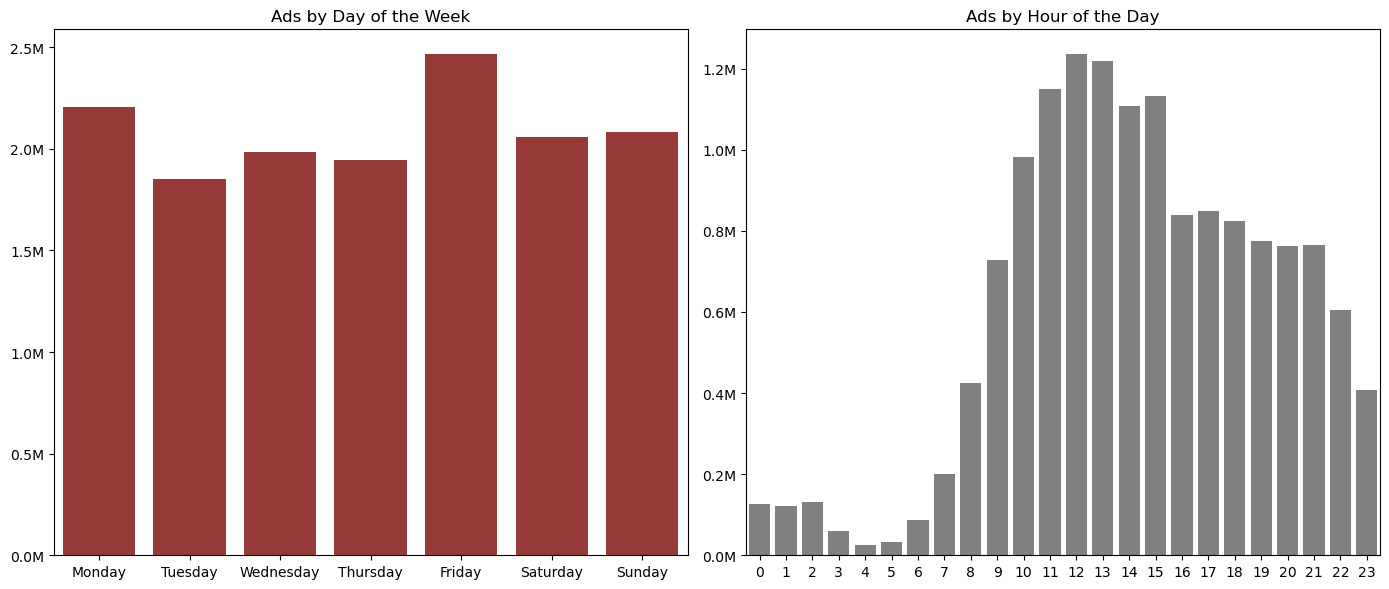

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

file_path = 'marketing_AB.csv'
data = pd.read_csv(file_path)

# Ensure 'most ads day' is a categorical type with a specific order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['most ads day'] = pd.Categorical(data['most ads day'], categories=day_order, ordered=True)

# Function to format y-axis labels
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'  # Convert to millions and format with 1 decimal place

# Plot graphs for EDA results
plt.figure(figsize=(14, 6))

# Day of the week for most and least ads
plt.subplot(1, 2, 1)
ads_by_day = data.groupby('most ads day')['total ads'].sum().reindex(day_order)  # Reindex to ensure correct order
sns.barplot(x=ads_by_day.index, y=ads_by_day.values, color='Brown')
plt.title('Ads by Day of the Week')
plt.xlabel('')  # Remove the x-axis label
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))  # Apply the formatter to the y-axis

# Hour of the day for most and least ads
plt.subplot(1, 2, 2)
ads_by_hour = data.groupby('most ads hour')['total ads'].sum().sort_values()
sns.barplot(x=ads_by_hour.index, y=ads_by_hour.values, color='Gray')
plt.title('Ads by Hour of the Day')
plt.xlabel('')  # Remove the x-axis label
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))  # Apply the formatter to the y-axis

plt.tight_layout()
plt.show()

In [31]:
import pandas as pd

# Load the data
data = pd.read_csv('marketing_AB.csv')

# Ensure 'most ads day' is a categorical type with a specific order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['most ads day'] = pd.Categorical(data['most ads day'], categories=day_order, ordered=True)

# Calculate the total ads per day of the week
ads_by_day = data.groupby('most ads day')['total ads'].sum().reindex(day_order)
print(ads_by_day)


most ads day
Monday       2205430
Tuesday      1853721
Wednesday    1985418
Thursday     1944173
Friday       2464496
Saturday     2060091
Sunday       2083853
Name: total ads, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_500\4011148126.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ads_by_day = data.groupby('most ads day')['total ads'].sum().reindex(day_order)


In [8]:
# Total number of users (visitors) in each group
visitors_ad = len(group_ad)
visitors_psa = len(group_psa)

# Total number of users who converted (conversions) in each group
conversions_ad = group_ad['converted'].sum()
conversions_psa = group_psa['converted'].sum()

print(f"Visitors in Ad Group: {visitors_ad}")
print(f"Conversions in Ad Group: {conversions_ad}")
print(f"Visitors in PSA Group: {visitors_psa}")
print(f"Conversions in PSA Group: {conversions_psa}")

Visitors in Ad Group: 564577
Conversions in Ad Group: 14423
Visitors in PSA Group: 23524
Conversions in PSA Group: 420


In [9]:
df = pd.read_csv('marketing_AB.csv')
group_a = df[(df['test group'] == 'ad') & (df['converted'] == True)].copy()
group_b = df[(df['test group'] == 'psa') & (df['converted'] == True)].copy()

Ad Group Conversion Rate: 0.0255 (2.55%)
Organic Group Conversion Rate: 0.0179 (1.79%)
Z-statistic: 7.37
p-value: 8.5265e-14
Critical Z-value: 1.64

Conclusion: Reject the null hypothesis. The Ad group performs significantly better than the PSA group.

Better Performing Group: Ad Group


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_500\4000111608.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


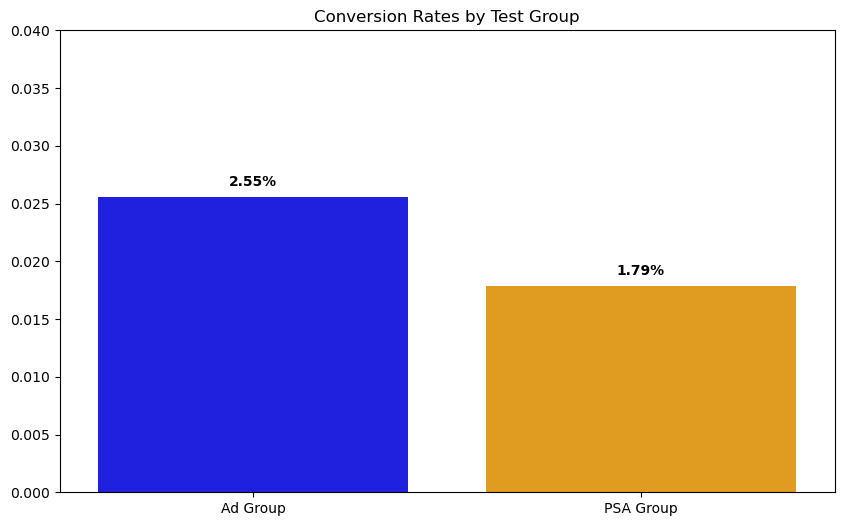

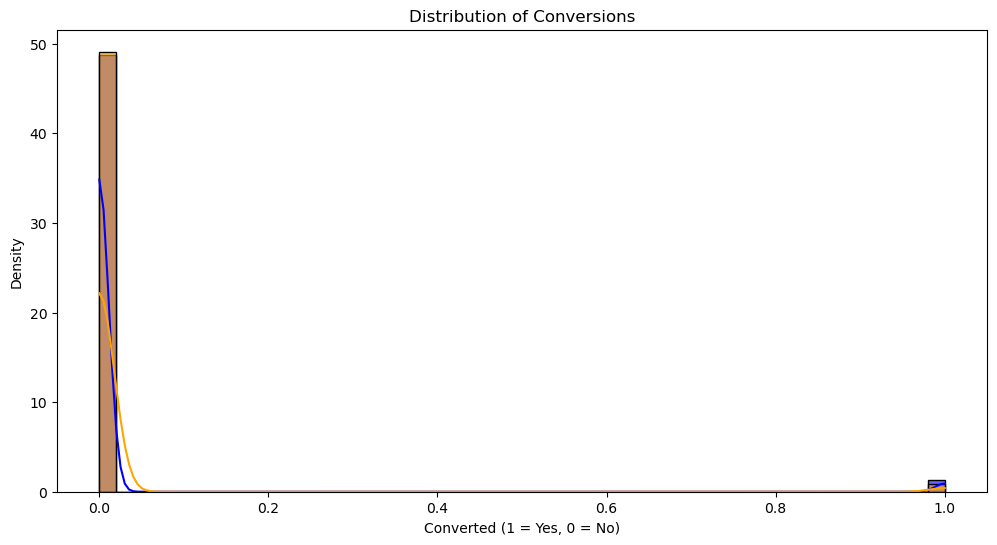

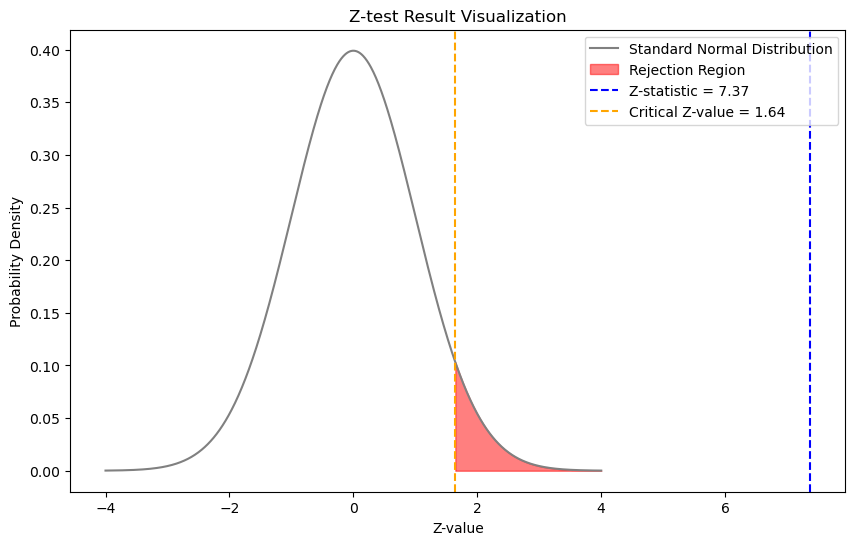

In [13]:
from scipy.stats import norm

# Load the data
file_path = 'marketing_AB.csv'
data = pd.read_csv(file_path)

# Calculate conversion rates for each group
conversion_rates = data.groupby('test group')['converted'].mean()

# Total number of users in each group
group_sizes = data['test group'].value_counts()

# Number of converted users in each group
converted_counts = data.groupby('test group')['converted'].sum()

# Conversion rates
p1 = conversion_rates['ad']
p2 = conversion_rates['psa']

# Group sizes
n1 = group_sizes['ad']
n2 = group_sizes['psa']

# Pooled conversion rate
p_pool = (converted_counts['ad'] + converted_counts['psa']) / (n1 + n2)

# Z-test statistic for one-tailed test
z_stat = (p1 - p2) / np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

# p-value for one-tailed test
p_value = 1 - norm.cdf(z_stat)  # One-tailed test

# Critical Z-value for 95% confidence in a one-tailed test
z_critical = norm.ppf(0.95)

# Display the results
print(f"Ad Group Conversion Rate: {p1:.4f} ({p1:.2%})")
print(f"Organic Group Conversion Rate: {p2:.4f} ({p2:.2%})")
print(f"Z-statistic: {z_stat:.2f}")
print(f"p-value: {p_value:.4e}")
print(f"Critical Z-value: {z_critical:.2f}")

if z_stat > z_critical and p_value < 0.05:
    print("\nConclusion: Reject the null hypothesis. The Ad group performs significantly better than the PSA group.")
    better_group = "Ad Group"
else:
    print("\nConclusion: Fail to reject the null hypothesis. No significant difference in performance between the groups.")
    better_group = "No significant difference"

print(f"\nBetter Performing Group: {better_group}")

# --- Visualization ---

# 1. Bar Plot of Conversion Rates
plt.figure(figsize=(10, 6))

# Use a specific palette with blue and orange
sns.barplot(
    x=['Ad', 'PSA'],
    y=[p1, p2],
    palette=['blue', 'orange']  # Blue for Ad Group, Orange for PSA Group
)

plt.title('Conversion Rates by Test Group')
plt.ylim(0, 0.04)
plt.xticks([0, 1], ['Ad Group', 'PSA Group'])
for i, v in enumerate([p1, p2]):
    plt.text(i, v + 0.001, f"{v:.2%}", ha='center', fontweight='bold')
plt.show()

# 2. Distribution Plot of Conversion
plt.figure(figsize=(12, 6))
sns.histplot(data[data['test group'] == 'ad']['converted'], bins=50, color='blue', label='Ad Group', stat='density', kde=True, alpha=0.6)
sns.histplot(data[data['test group'] == 'psa']['converted'], bins=50, color='orange', label='PSA Group', stat='density', kde=True, alpha=0.6)
plt.title('Distribution of Conversions')
plt.xlabel('Converted (1 = Yes, 0 = No)')
plt.ylabel('Density')
plt.show()

# 3. Z-test Distribution Plot
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution', color='gray')
plt.fill_between(x, y, where=(x >= z_critical), color='red', alpha=0.5, label='Rejection Region')
plt.axvline(x=z_stat, color='blue', linestyle='--', label=f'Z-statistic = {z_stat:.2f}')
plt.axvline(x=z_critical, color='orange', linestyle='--', label=f'Critical Z-value = {z_critical:.2f}')
plt.title('Z-test Result Visualization')
plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [5]:
# Load the data
file_path = 'marketing_AB.csv'
data = pd.read_csv(file_path)

# Filter the dataset for the "ad" test group
ad_group_df = data[data['test group'] == 'ad']

# Calculate the most ads day statistics
most_ads_day = ad_group_df['most ads day'].value_counts()
most_ads_day_conversion = ad_group_df.groupby('most ads day')['converted'].mean()

# Calculate the most ads hour statistics
most_ads_hour = ad_group_df['most ads hour'].value_counts()
most_ads_hour_conversion = ad_group_df.groupby('most ads hour')['converted'].mean()

most_ads_day, most_ads_day_conversion, most_ads_hour, most_ads_hour_conversion


(most ads day
 Friday       88805
 Monday       83571
 Sunday       82332
 Thursday     79077
 Saturday     78802
 Wednesday    77418
 Tuesday      74572
 Name: count, dtype: int64,
 most ads day
 Friday       0.022465
 Monday       0.033241
 Saturday     0.021307
 Sunday       0.024620
 Thursday     0.021637
 Tuesday      0.030440
 Wednesday    0.025356
 Name: converted, dtype: float64,
 most ads hour
 13    45485
 12    45238
 11    44149
 14    43779
 15    42855
 10    37454
 16    35963
 17    33605
 18    31052
 9     29802
 19    29169
 21    28895
 20    27846
 22    25515
 23    19547
 8     16968
 7      6168
 0      5309
 2      5152
 1      4615
 3      2590
 6      1985
 5       742
 4       694
 Name: count, dtype: int64,
 most ads hour
 0     0.019213
 1     0.013434
 2     0.007570
 3     0.010425
 4     0.015850
 5     0.021563
 6     0.023174
 7     0.018482
 8     0.019861
 9     0.019529
 10    0.021840
 11    0.022469
 12    0.024139
 13    0.025063
 14    0.028575

C:\Users\angin\AppData\Local\Temp\ipykernel_18960\2350976995.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['most ads day', 'most ads hour'])['total ads'].sum().reset_index()
C:\Users\angin\AppData\Local\Temp\ipykernel_18960\2350976995.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=grouped_data.groupby('most ads day')['total ads'].sum().reset_index(),
C:\Users\angin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

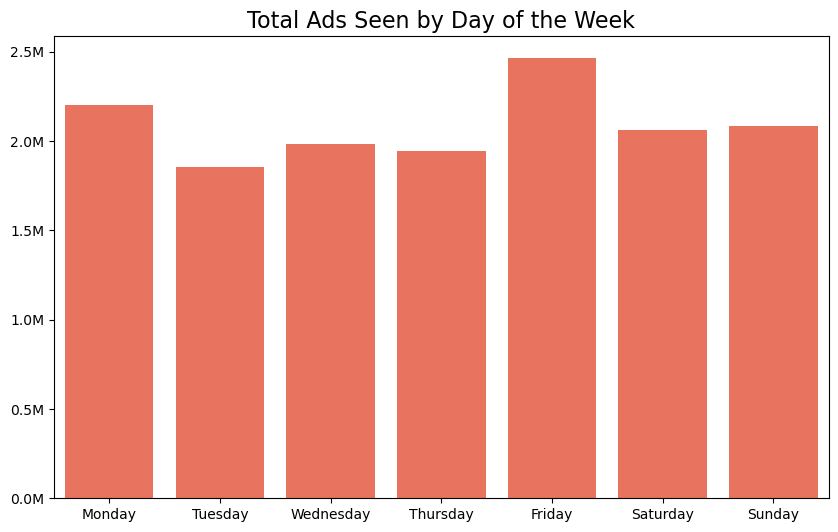

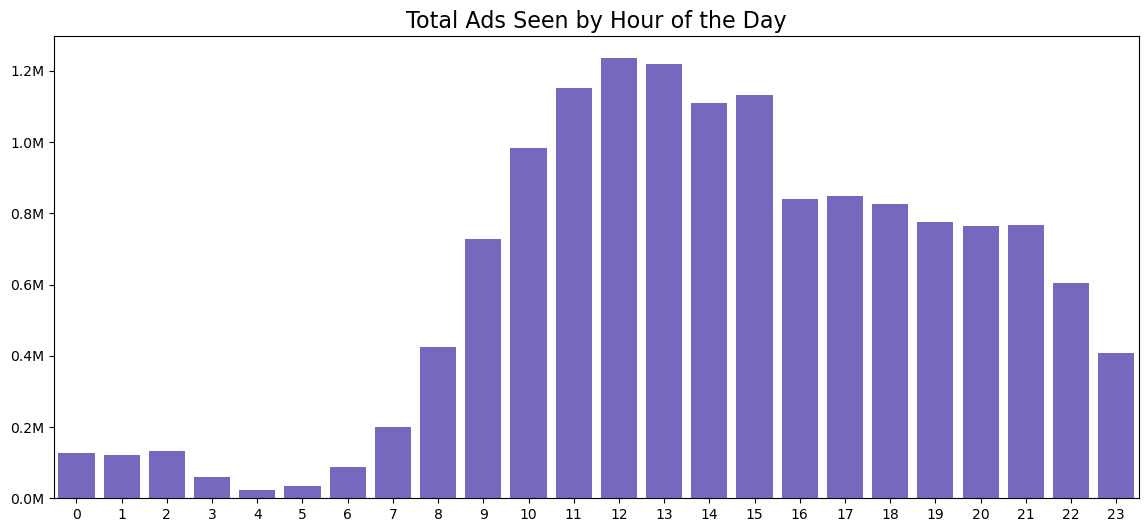

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Ensure 'most ads day' is a categorical variable with the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['most ads day'] = pd.Categorical(data['most ads day'], categories=days_order, ordered=True)

# Ensure 'most ads hour' is an integer
data['most ads hour'] = data['most ads hour'].astype(int)

# Group by 'most ads day' and 'most ads hour' and calculate total ads
grouped_data = data.groupby(['most ads day', 'most ads hour'])['total ads'].sum().reset_index()

# Function to format y-axis labels
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'  # Convert to millions and format with 1 decimal place

# Plotting total ads by day of the week with custom y-axis labels
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x='most ads day',
    y='total ads',
    data=grouped_data.groupby('most ads day')['total ads'].sum().reset_index(),
    color='#FF6347'  # Tomato color
)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Total Ads Seen by Day of the Week', fontsize=16)
ax.get_yaxis().set_major_formatter(FuncFormatter(millions))  # Apply the custom formatter
plt.show()

# Plotting total ads by hour of the day with custom y-axis labels
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(
    x='most ads hour',
    y='total ads',
    data=grouped_data.groupby('most ads hour')['total ads'].sum().reset_index(),
    color='#6A5ACD'  # SlateBlue color
)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Total Ads Seen by Hour of the Day', fontsize=16)
ax.get_yaxis().set_major_formatter(FuncFormatter(millions))  # Apply the custom formatter
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10316\1558507517.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_data['most ads day'] = pd.Categorical(ad_data['most ads day'], categories=days_order, ordered=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10316\1558507517.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_data['most ads hour'] = ad_data['most ads hour'].astype(int)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10316\1558507517.py:20: FutureWarning: The default of observed=False i

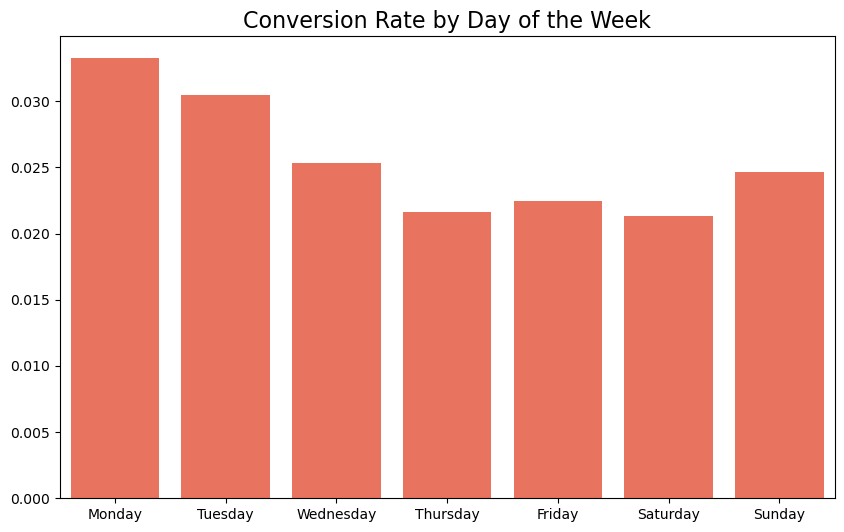

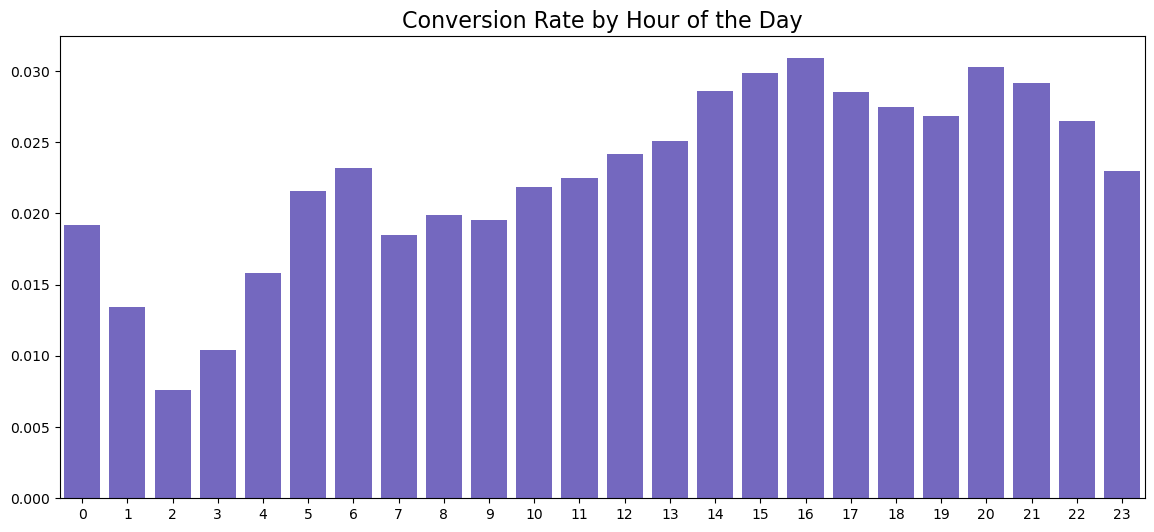

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'marketing_AB.csv'
data = pd.read_csv(file_path)

# Filter data for the ad group only
ad_data = data[data['test group'] == 'ad']

# Ensure 'most ads day' is a categorical variable with the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ad_data['most ads day'] = pd.Categorical(ad_data['most ads day'], categories=days_order, ordered=True)

# Ensure 'most ads hour' is an integer
ad_data['most ads hour'] = ad_data['most ads hour'].astype(int)

# Calculate conversion rate by day of the week
conversion_rate_day = ad_data.groupby('most ads day').agg(
    conversions=('converted', 'sum'),
    total=('user id', 'count')
).reset_index()
conversion_rate_day['conversion_rate'] = conversion_rate_day['conversions'] / conversion_rate_day['total']

# Calculate conversion rate by hour of the day
conversion_rate_hour = ad_data.groupby('most ads hour').agg(
    conversions=('converted', 'sum'),
    total=('user id', 'count')
).reset_index()
conversion_rate_hour['conversion_rate'] = conversion_rate_hour['conversions'] / conversion_rate_hour['total']

# Plotting conversion rate by day of the week
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x='most ads day',
    y='conversion_rate',
    data=conversion_rate_day,
    color='#FF6347' 
)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Conversion Rate by Day of the Week', fontsize=16)
plt.show()

# Plotting conversion rate by hour of the day
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(
    x='most ads hour',
    y='conversion_rate',
    data=conversion_rate_hour,
    color='#6A5ACD'
)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Conversion Rate by Hour of the Day', fontsize=16)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10316\2516512872.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['most ads day', 'most ads hour'])['total ads'].sum().reset_index()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10316\2516512872.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=grouped_data.groupby('most ads day')['total ads'].sum().reset_index(),


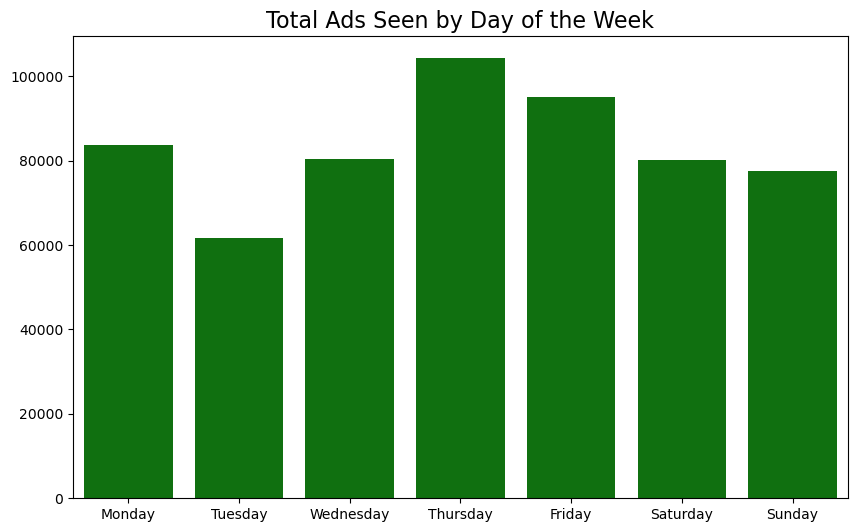

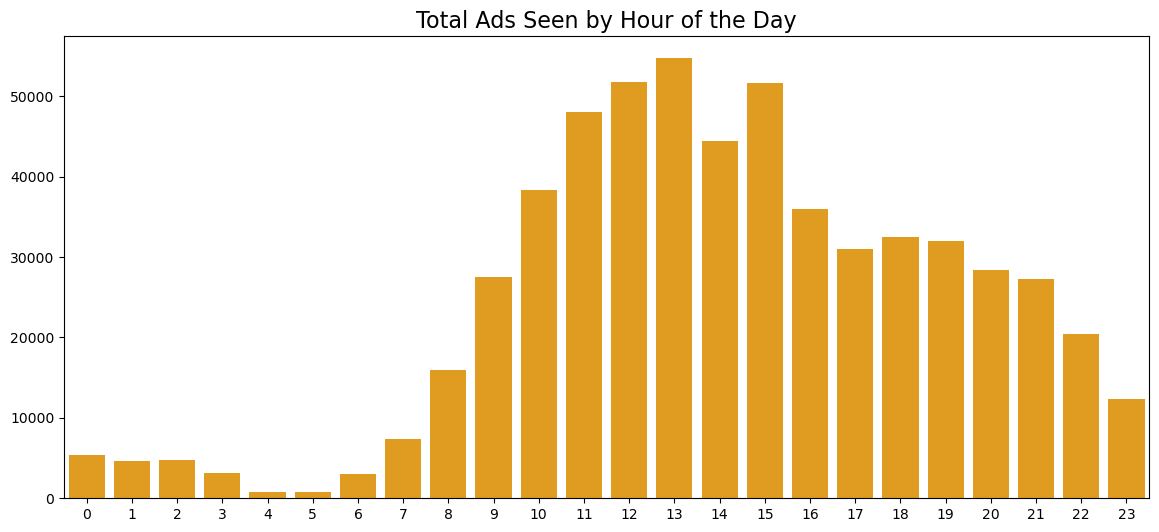

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for psa group
data = data[data['test group'] == 'psa']

# Ensure 'most ads day' is a categorical variable with the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['most ads day'] = pd.Categorical(data['most ads day'], categories=days_order, ordered=True)

# Ensure 'most ads hour' is an integer and in correct range
data['most ads hour'] = data['most ads hour'].astype(int)

# Group by 'most ads day' and 'most ads hour' and calculate total ads
grouped_data = data.groupby(['most ads day', 'most ads hour'])['total ads'].sum().reset_index()

# Plotting total ads by day of the week
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x='most ads day',
    y='total ads',
    data=grouped_data.groupby('most ads day')['total ads'].sum().reset_index(),
    color='green'  # Forest green color
)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Total Ads Seen by Day of the Week', fontsize=16)
plt.xticks(rotation=0)  # Ensures horizontal text
plt.show()

# Plotting total ads by hour of the day
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(
    x='most ads hour',
    y='total ads',
    data=grouped_data.groupby('most ads hour')['total ads'].sum().reset_index(),
    color='orange'  # Goldenrod color
)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Total Ads Seen by Hour of the Day', fontsize=16)
plt.xticks(rotation=0)  # Ensures horizontal text
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10316\3038693328.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rate_day = psa_data.groupby('most ads day').agg(


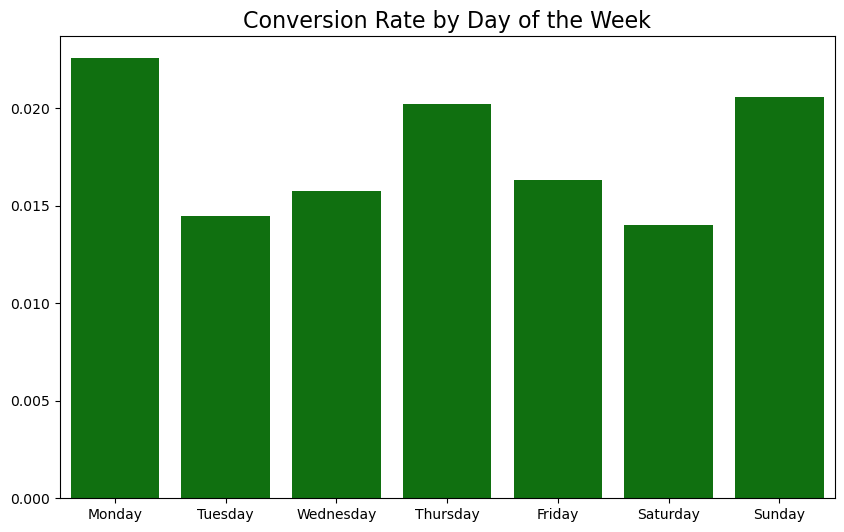

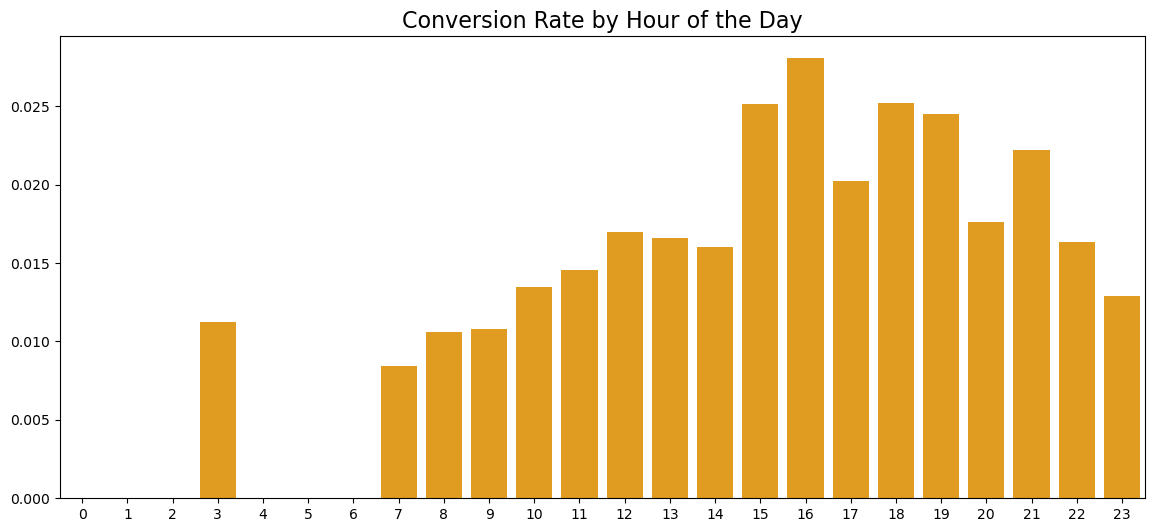

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the PSA group only
psa_data = data[data['test group'] == 'psa']

# Ensure 'most ads day' is a categorical variable with the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
psa_data['most ads day'] = pd.Categorical(psa_data['most ads day'], categories=days_order, ordered=True)

# Ensure 'most ads hour' is an integer
psa_data['most ads hour'] = psa_data['most ads hour'].astype(int)

# Calculate conversion rate by day of the week
conversion_rate_day = psa_data.groupby('most ads day').agg(
    conversions=('converted', 'sum'),
    total=('user id', 'count')
).reset_index()
conversion_rate_day['conversion_rate'] = conversion_rate_day['conversions'] / conversion_rate_day['total']

# Calculate conversion rate by hour of the day
conversion_rate_hour = psa_data.groupby('most ads hour').agg(
    conversions=('converted', 'sum'),
    total=('user id', 'count')
).reset_index()
conversion_rate_hour['conversion_rate'] = conversion_rate_hour['conversions'] / conversion_rate_hour['total']

# Plotting conversion rate by day of the week
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x='most ads day',
    y='conversion_rate',
    data=conversion_rate_day,
    color='Green'
)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Conversion Rate by Day of the Week', fontsize=16)
plt.xticks(rotation=0)  # Ensure horizontal text
plt.show()

# Plotting conversion rate by hour of the day
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(
    x='most ads hour',
    y='conversion_rate',
    data=conversion_rate_hour,
    color='Orange'
)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Conversion Rate by Hour of the Day', fontsize=16)
plt.xticks(rotation=0)  # Ensure horizontal text
plt.show()

In [18]:
import pandas as pd

# Group data by test group and day of the week
grouped_day = data.groupby(['test group', 'most ads day'])['converted'].mean().unstack() * 100

# Print conversion rates for each day of the week
print("Conversion Rates by Days of the Week:")
print(grouped_day)

Conversion Rates by Days of the Week:
most ads day    Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
test group                                                                  
psa           2.255854  1.444788   1.575931  2.023047  1.630292   1.39958   

most ads day    Sunday  
test group              
psa           2.059497  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_500\237015826.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_day = data.groupby(['test group', 'most ads day'])['converted'].mean().unstack() * 100


In [19]:
import pandas as pd

# Group data by test group and hour of the day
grouped_hour = data.groupby(['test group', 'most ads hour'])['converted'].mean().unstack() * 100

# Print conversion rates for each hour of the day
print("Conversion Rates by Hours of the Day:")
print(grouped_hour)

Conversion Rates by Hours of the Day:
most ads hour   0    1    2         3    4    5    6         7         8   \
test group                                                                  
psa            0.0  0.0  0.0  1.123596  0.0  0.0  0.0  0.843882  1.062215   

most ads hour        9   ...        14        15        16        17  \
test group               ...                                           
psa            1.081531  ...  1.605136  2.516411  2.805486  2.024584   

most ads hour        18        19       20        21        22        23  
test group                                                                
psa            2.517703  2.451395  1.76416  2.220167  1.635769  1.292407  

[1 rows x 24 columns]


In [20]:
import pandas as pd
import scipy.stats as stats

# Group data by test group and day of the week
grouped_day = data.groupby(['test group', 'most ads day'])['converted'].agg(['count', 'sum'])

# Calculate conversion rates
grouped_day['conversion_rate'] = grouped_day['sum'] / grouped_day['count']

# Perform A/B testing for each day of the week
days_of_week = data['most ads day'].unique()
ab_test_results = {}

for day in days_of_week:
    ad_converted = data[(data['test group'] == 'ad') & (data['most ads day'] == day)]['converted']
    psa_converted = data[(data['test group'] == 'psa') & (data['most ads day'] == day)]['converted']
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(ad_converted, psa_converted)
    ab_test_results[day] = {'t_stat': t_stat, 'p_value': p_value}

# Display A/B test results
for day, result in ab_test_results.items():
    print(f"Day: {day}, T-Statistic: {result['t_stat']}, P-Value: {result['p_value']}")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_500\186339952.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_day = data.groupby(['test group', 'most ads day'])['converted'].agg(['count', 'sum'])


Day: Saturday, T-Statistic: nan, P-Value: nan
Day: Thursday, T-Statistic: nan, P-Value: nan
Day: Tuesday, T-Statistic: nan, P-Value: nan
Day: Wednesday, T-Statistic: nan, P-Value: nan
Day: Monday, T-Statistic: nan, P-Value: nan
Day: Friday, T-Statistic: nan, P-Value: nan
Day: Sunday, T-Statistic: nan, P-Value: nan


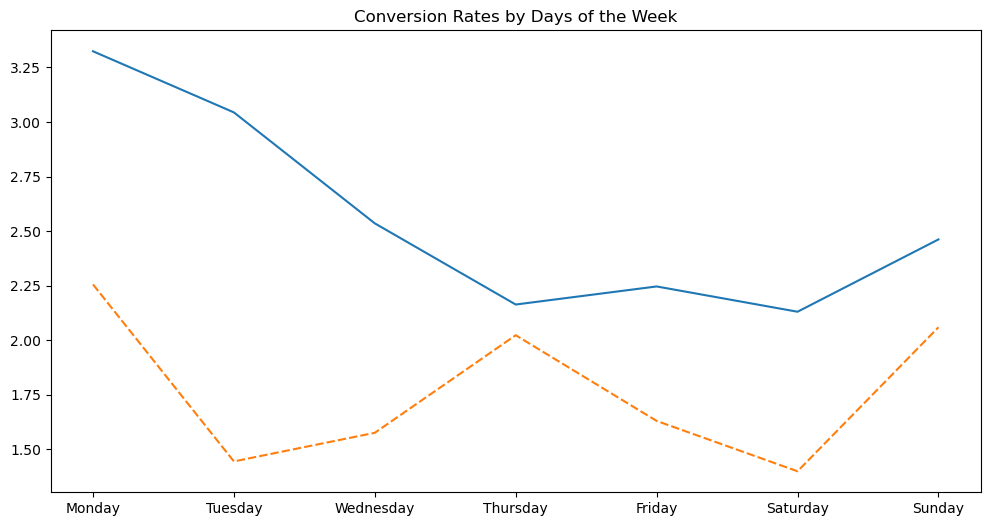

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'marketing_AB.csv'
data = pd.read_csv(file_path)

# Group data by test group and day of the week
grouped_day = data.groupby(['test group', 'most ads day'])['converted'].mean().unstack() * 100

# Define the order for days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the grouped_day DataFrame based on the days_order
grouped_day = grouped_day[days_order]

# Plot the conversion rates by days of the week
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_day.T)
plt.title('Conversion Rates by Days of the Week')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()


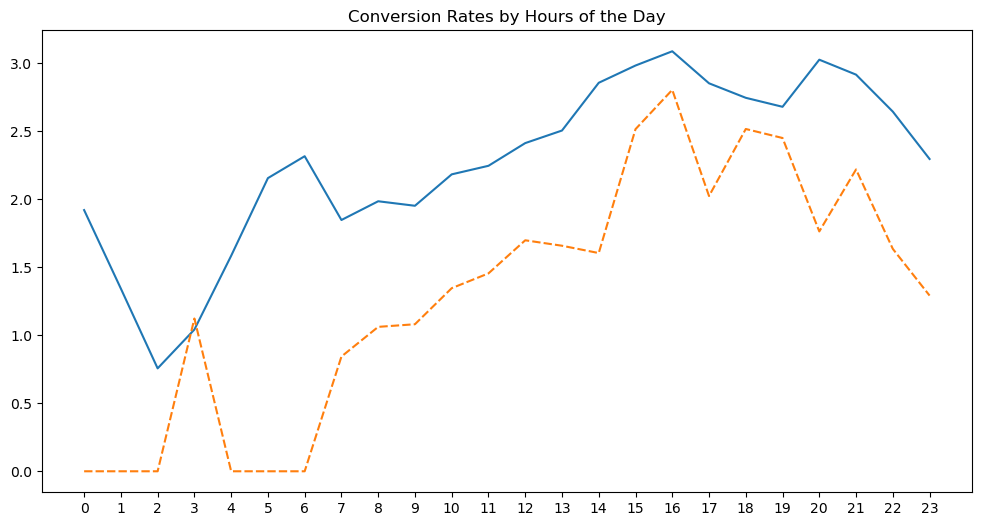

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'marketing_AB.csv'
data = pd.read_csv(file_path)

# Group data by test group and hour of the day
grouped_hour = data.groupby(['test group', 'most ads hour'])['converted'].mean().unstack() * 100

# Define the order for hours of the day
hours_order = list(range(24))

# Reorder the grouped_hour DataFrame based on the hours_order
grouped_hour = grouped_hour.reindex(columns=hours_order)

# Plot the conversion rates by hours of the day
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_hour.T)
plt.title('Conversion Rates by Hours of the Day')
plt.xticks(ticks=hours_order, rotation=0)  # Set x-axis ticks to show hours from 0 to 23
plt.xlabel('')
plt.ylabel('')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()


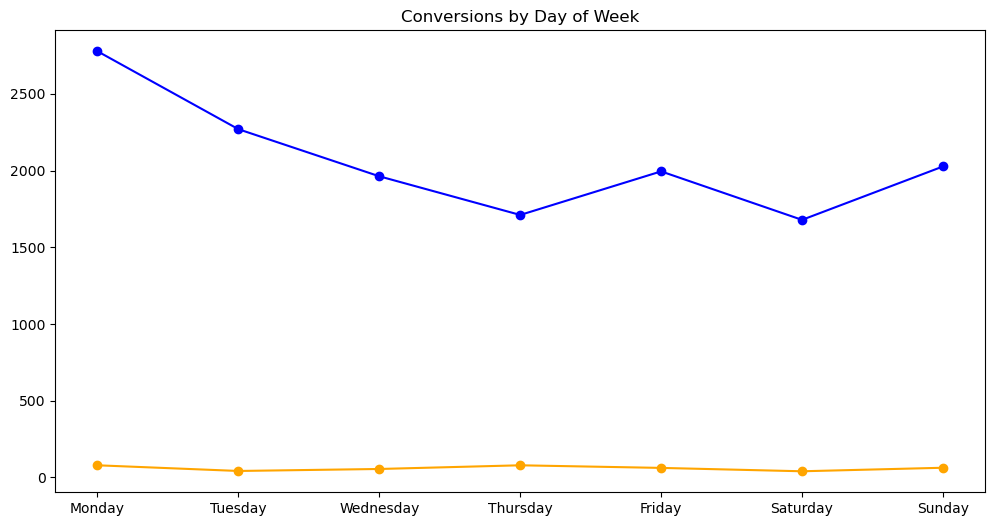

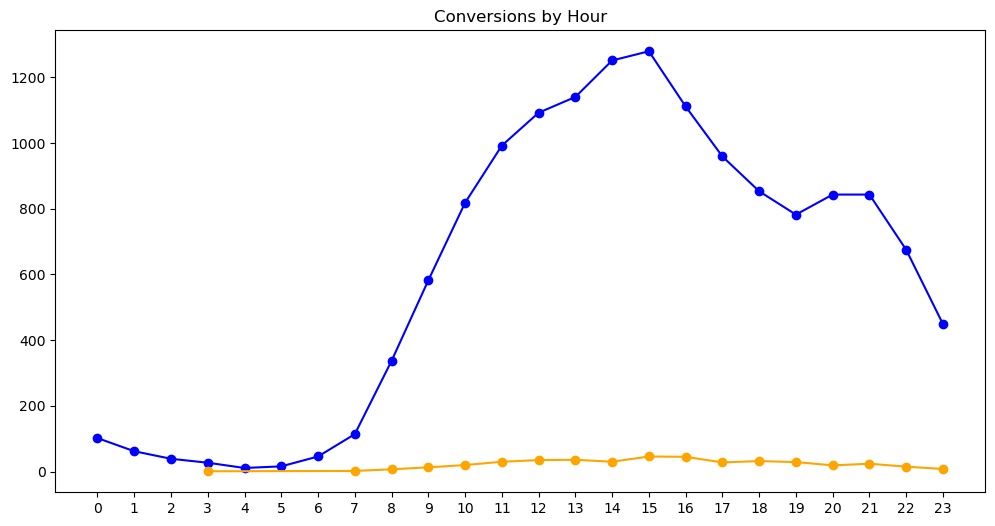

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming group_a and group_b are defined and populated DataFrames
# Adding columns for most ads day and hour
group_a.loc[:, 'day_of_week'] = group_a['most ads day']
group_b.loc[:, 'day_of_week'] = group_b['most ads day']
group_a.loc[:, 'hour'] = group_a['most ads hour']
group_b.loc[:, 'hour'] = group_b['most ads hour']

# Define the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by day of week
group_a_week = group_a.groupby('day_of_week').size().reindex(days_order, fill_value=0)
group_b_week = group_b.groupby('day_of_week').size().reindex(days_order, fill_value=0)

# Group by hour
group_a_hour = group_a.groupby('hour').size()
group_b_hour = group_b.groupby('hour').size()

def plot_comparison(group_a, group_b, title, is_hourly=False):
    plt.figure(figsize=(12, 6))
    
    # Plot lines
    plt.plot(group_a.index, group_a.values, marker='o', color='blue')
    plt.plot(group_b.index, group_b.values, marker='o', color='orange')
    
    # Remove grid lines
    plt.grid(False)

    # Title
    plt.title(title)

    # Show 24 hours on x-axis for hourly data
    if is_hourly:
        plt.xticks(range(24))  # Show all 24 hours from 0 to 23

    plt.show()

# Plot comparison by day of week
plot_comparison(group_a_week, group_b_week, 'Conversions by Day of Week')

# Plot comparison by hour
plot_comparison(group_a_hour, group_b_hour, 'Conversions by Hour', is_hourly=True)


--- Monday ---
Ad Group Conversion Rate: 0.0332 (3.32%)
PSA Group Conversion Rate: 0.0226 (2.26%)
Z-statistic: 3.48
p-value: 2.5391e-04
Critical Z-value: 1.64
Better Performing Group: Ad Group

--- Tuesday ---
Ad Group Conversion Rate: 0.0304 (3.04%)
PSA Group Conversion Rate: 0.0144 (1.44%)
Z-statistic: 4.97
p-value: 3.3172e-07
Critical Z-value: 1.64
Better Performing Group: Ad Group

--- Wednesday ---
Ad Group Conversion Rate: 0.0254 (2.54%)
PSA Group Conversion Rate: 0.0158 (1.58%)
Z-statistic: 3.56
p-value: 1.8821e-04
Critical Z-value: 1.64
Better Performing Group: Ad Group

--- Thursday ---
Ad Group Conversion Rate: 0.0216 (2.16%)
PSA Group Conversion Rate: 0.0202 (2.02%)
Z-statistic: 0.59
p-value: 2.7738e-01
Critical Z-value: 1.64
Better Performing Group: No significant difference

--- Friday ---
Ad Group Conversion Rate: 0.0225 (2.25%)
PSA Group Conversion Rate: 0.0163 (1.63%)
Z-statistic: 2.53
p-value: 5.7844e-03
Critical Z-value: 1.64
Better Performing Group: Ad Group

--- Sat

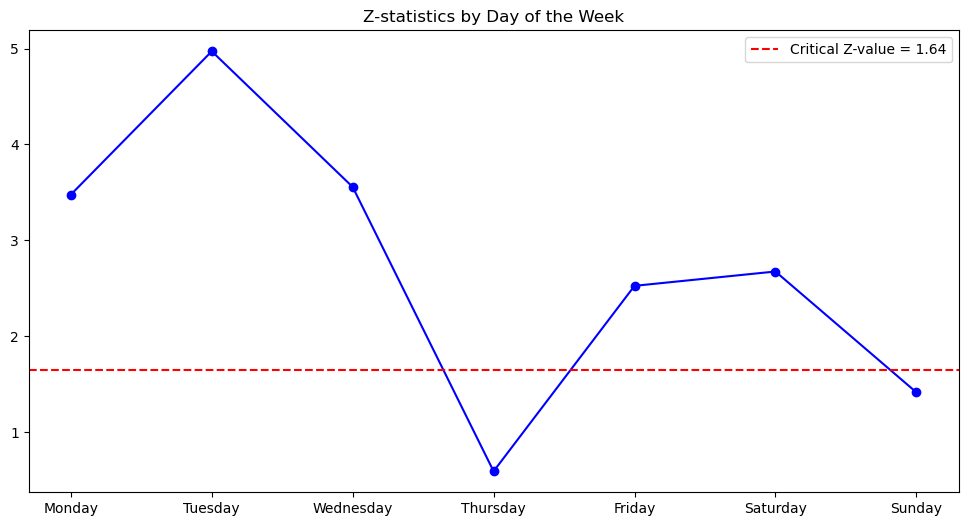

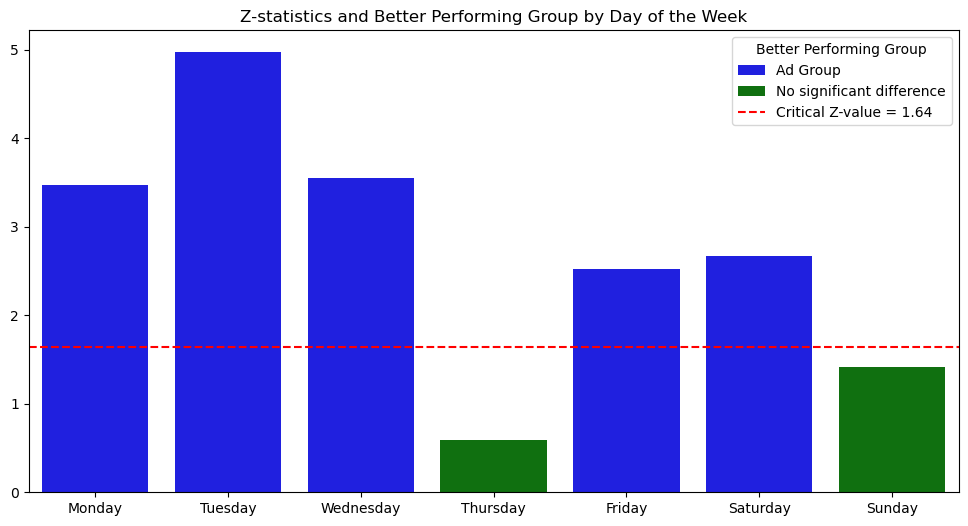

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Load the data
file_path = 'marketing_AB.csv'
data = pd.read_csv(file_path)

# Define the order for days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group data by test group and day of the week
grouped_day = data.groupby(['test group', 'most ads day'])['converted'].mean().unstack() * 100

# Reorder the grouped_day DataFrame based on the days_order
grouped_day = grouped_day[days_order]

# Initialize lists to store the results
z_stats = []
p_values = []
better_groups = []

# Loop over each day of the week to perform Z-test
for day in days_order:
    p1 = grouped_day.loc['ad', day] / 100
    p2 = grouped_day.loc['psa', day] / 100
    
    # Number of users per group per day
    n1 = data[(data['test group'] == 'ad') & (data['most ads day'] == day)].shape[0]
    n2 = data[(data['test group'] == 'psa') & (data['most ads day'] == day)].shape[0]
    
    # Pooled conversion rate
    p_pool = (p1 * n1 + p2 * n2) / (n1 + n2)
    
    # Z-test statistic for one-tailed test
    z_stat = (p1 - p2) / np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
    
    # p-value for one-tailed test
    p_value = 1 - norm.cdf(z_stat)  # One-tailed test
    
    # Critical Z-value for 95% confidence in a one-tailed test
    z_critical = norm.ppf(0.95)
    
    # Determine better group
    if z_stat > z_critical and p_value < 0.05:
        better_group = "Ad Group"
    else:
        better_group = "No significant difference"
    
    # Store results
    z_stats.append(z_stat)
    p_values.append(p_value)
    better_groups.append(better_group)
    
    # Display the results for each day
    print(f"--- {day} ---")
    print(f"Ad Group Conversion Rate: {p1:.4f} ({p1:.2%})")
    print(f"PSA Group Conversion Rate: {p2:.4f} ({p2:.2%})")
    print(f"Z-statistic: {z_stat:.2f}")
    print(f"p-value: {p_value:.4e}")
    print(f"Critical Z-value: {z_critical:.2f}")
    print(f"Better Performing Group: {better_group}\n")

# --- Visualization ---

# 1. Line Plot of Z-statistics by Day
plt.figure(figsize=(12, 6))
plt.plot(days_order, z_stats, marker='o', linestyle='-', color='blue')
plt.axhline(y=z_critical, color='red', linestyle='--', label=f'Critical Z-value = {z_critical:.2f}')
plt.title('Z-statistics by Day of the Week')
plt.legend()
plt.show()

# Define the custom palette with blue and light green
custom_palette = ["blue", "green"]  # blue and light green

plt.figure(figsize=(12, 6))
sns.barplot(x=days_order, y=z_stats, hue=better_groups, dodge=False, palette=custom_palette)
plt.axhline(y=z_critical, color='red', linestyle='--', label=f'Critical Z-value = {z_critical:.2f}')
plt.title('Z-statistics and Better Performing Group by Day of the Week')
plt.legend(title='Better Performing Group')
plt.show()


--- Hour 0 ---
Ad Group Conversion Rate: 0.0192 (1.92%)
PSA Group Conversion Rate: 0.0000 (0.00%)
Z-statistic: 2.11
p-value: 1.7521e-02
Critical Z-value: 1.64
Better Performing Group: Ad Group

--- Hour 1 ---
Ad Group Conversion Rate: 0.0134 (1.34%)
PSA Group Conversion Rate: 0.0000 (0.00%)
Z-statistic: 1.60
p-value: 5.5318e-02
Critical Z-value: 1.64
Better Performing Group: No significant difference

--- Hour 2 ---
Ad Group Conversion Rate: 0.0076 (0.76%)
PSA Group Conversion Rate: 0.0000 (0.00%)
Z-statistic: 1.17
p-value: 1.2003e-01
Critical Z-value: 1.64
Better Performing Group: No significant difference

--- Hour 3 ---
Ad Group Conversion Rate: 0.0104 (1.04%)
PSA Group Conversion Rate: 0.0112 (1.12%)
Z-statistic: -0.07
p-value: 5.2949e-01
Critical Z-value: 1.64
Better Performing Group: No significant difference

--- Hour 4 ---
Ad Group Conversion Rate: 0.0159 (1.59%)
PSA Group Conversion Rate: 0.0000 (0.00%)
Z-statistic: 0.67
p-value: 2.5101e-01
Critical Z-value: 1.64
Better Perfor

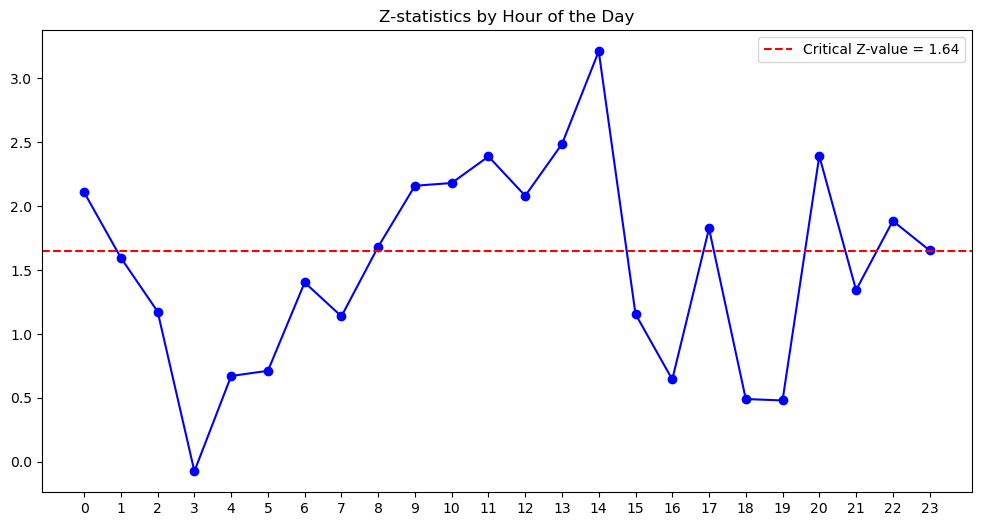

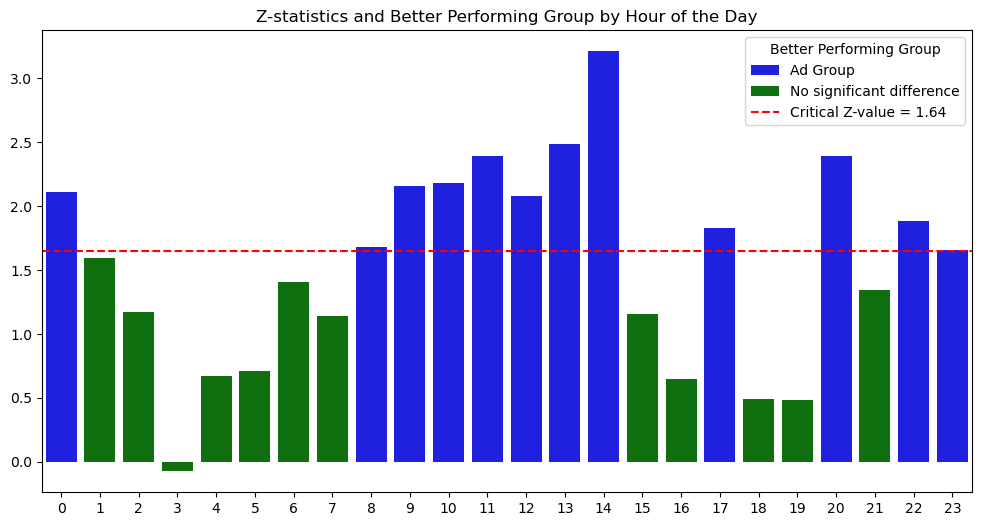

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Load the dataset
file_path = 'marketing_AB.csv'
data = pd.read_csv(file_path)

# Group data by test group and hour of the day
grouped_hour = data.groupby(['test group', 'most ads hour'])['converted'].mean().unstack() * 100

# Define the order for hours of the day
hours_order = list(range(24))

# Reorder the grouped_hour DataFrame based on the hours_order
grouped_hour = grouped_hour.reindex(columns=hours_order)

# Initialize lists to store the results
z_stats = []
p_values = []
better_groups = []

# Loop over each hour of the day to perform Z-test
for hour in hours_order:
    p1 = grouped_hour.loc['ad', hour] / 100
    p2 = grouped_hour.loc['psa', hour] / 100
    
    # Number of users per group per hour
    n1 = data[(data['test group'] == 'ad') & (data['most ads hour'] == hour)].shape[0]
    n2 = data[(data['test group'] == 'psa') & (data['most ads hour'] == hour)].shape[0]
    
    # Pooled conversion rate
    p_pool = (p1 * n1 + p2 * n2) / (n1 + n2)
    
    # Z-test statistic for one-tailed test
    z_stat = (p1 - p2) / np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
    
    # p-value for one-tailed test
    p_value = 1 - norm.cdf(z_stat)  # One-tailed test
    
    # Critical Z-value for 95% confidence in a one-tailed test
    z_critical = norm.ppf(0.95)
    
    # Determine better group
    if z_stat > z_critical and p_value < 0.05:
        better_group = "Ad Group"
    else:
        better_group = "No significant difference"
    
    # Store results
    z_stats.append(z_stat)
    p_values.append(p_value)
    better_groups.append(better_group)
    
    # Display the results for each hour
    print(f"--- Hour {hour} ---")
    print(f"Ad Group Conversion Rate: {p1:.4f} ({p1:.2%})")
    print(f"PSA Group Conversion Rate: {p2:.4f} ({p2:.2%})")
    print(f"Z-statistic: {z_stat:.2f}")
    print(f"p-value: {p_value:.4e}")
    print(f"Critical Z-value: {z_critical:.2f}")
    print(f"Better Performing Group: {better_group}\n")

# --- Visualization ---

# 1. Line Plot of Z-statistics by Hour
plt.figure(figsize=(12, 6))
plt.plot(hours_order, z_stats, marker='o', linestyle='-', color='blue')
plt.axhline(y=z_critical, color='red', linestyle='--', label=f'Critical Z-value = {z_critical:.2f}')
plt.title('Z-statistics by Hour of the Day')
plt.xticks(ticks=hours_order)  # Ensure X-axis shows all hours from 0 to 23
plt.legend()
plt.show()

# 2. Bar Plot of Better Performing Group by Hour

# Define the custom palette with blue and light green
custom_palette = ["blue", "green"]  # blue and light green

plt.figure(figsize=(12, 6))
sns.barplot(x=hours_order, y=z_stats, hue=better_groups, dodge=False, palette=custom_palette)
plt.axhline(y=z_critical, color='red', linestyle='--', label=f'Critical Z-value = {z_critical:.2f}')
plt.title('Z-statistics and Better Performing Group by Hour of the Day')
plt.xticks(ticks=hours_order)  # Ensure X-axis shows all hours from 0 to 23
plt.legend(title='Better Performing Group')
plt.show()

In [16]:
import pandas as pd

grouped_data_ad = pd.DataFrame(data)

# Group data by 'most ads day' and calculate the total ads
grouped_by_day = grouped_data_ad.groupby('most ads day')['total ads'].sum().reset_index()
print(grouped_by_day)

# Group data by 'most ads hour' and calculate the total ads
grouped_by_hour = grouped_data_ad.groupby('most ads hour')['total ads'].sum().reset_index()
print(grouped_by_hour)

  most ads day  total ads
0       Friday    2464496
1       Monday    2205430
2     Saturday    2060091
3       Sunday    2083853
4     Thursday    1944173
5      Tuesday    1853721
6    Wednesday    1985418
    most ads hour  total ads
0               0     126104
1               1     120914
2               2     132099
3               3      60896
4               4      24124
5               5      33391
6               6      86532
7               7     199935
8               8     423747
9               9     728186
10             10     983277
11             11    1150746
12             12    1235256
13             13    1219675
14             14    1108586
15             15    1133132
16             16     840317
17             17     848487
18             18     824967
19             19     774655
20             20     763016
21             21     766059
22             22     605774
23             23     407307


In [1]:
import pandas as pd

# Load data from CSV
grouped_data_ad = pd.read_csv('marketing_AB.csv')

# Ensure data is in DataFrame format
grouped_data_ad = pd.DataFrame(grouped_data_ad)

# Filter data for the 'ad' group in the test group
ad_group_data = grouped_data_ad[grouped_data_ad['test group'] == 'ad']

# Group data by 'most ads day' and calculate the total ads
grouped_by_day = ad_group_data.groupby('most ads day')['total ads'].sum().reset_index()
print("Grouped by Day:")
print(grouped_by_day)

# Group data by 'most ads hour' and calculate the total ads
grouped_by_hour = ad_group_data.groupby('most ads hour')['total ads'].sum().reset_index()
print("Grouped by Hour:")
print(grouped_by_hour)

Grouped by Day:
  most ads day  total ads
0       Friday    2369546
1       Monday    2121848
2     Saturday    1980043
3       Sunday    2006360
4     Thursday    1839933
5      Tuesday    1792031
6    Wednesday    1904940
Grouped by Hour:
    most ads hour  total ads
0               0     120682
1               1     116307
2               2     127282
3               3      57776
4               4      23380
5               5      32645
6               6      83487
7               7     192539
8               8     407747
9               9     700615
10             10     944888
11             11    1102657
12             12    1183507
13             13    1164947
14             14    1064130
15             15    1081442
16             16     804324
17             17     817456
18             18     792464
19             19     742621
20             20     734643
21             21     738810
22             22     585350
23             23     395002
